# Baseline Titanic challenge Solution¶
Data Description

The titanic challenge is a challenge on the predominant titanic event that took place years ago at ..... where we had alot of people on a ship. Unfortunately, the ship collided with an iceberg which led to the sinking of the ship and loss of so many lives. This challenge is therefore put forth from the details gotten regarding people on the ship who survived and those who didnt. The challenge is all about you (the data scienctist) build a predictive model which is able to determine peoples survival.

The Data Set

The data set is avaliable on kaggle and can be accessed using the link below: https://www.kaggle.com/c/titanic

Data description

from the dataset we do have the following information stated regarding each fellow on the ship:

*passenger_id

*pclass

*name

*sex

*age

*sibsp

*parch

*ticket

*fare

*cabin

*embarked

the bone of contention is to forecast the survival of a person given the details above.

Survival in this case can be represented in binary:

*one (1) means 'will survive'.

*zero (0) means 'will not survive'.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

import os, sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('C:\Users\Ife\Desktop\Rasheed doc\my_traindata.csv')

test = pd.read_csv('C:\Users\Ife\Desktop\Rasheed doc\my_test.csv')

In [3]:
train.shape , test.shape #dimension of each data

((891, 12), (418, 11))

In [4]:
data = train.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Cleaning data: drop and filling NaN values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Cabin

In [6]:
#Since number of valid entries in 'Cabin column' is too small compared to the overall data, the missing values will be dropped
data = data.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


# Age

In [8]:
data['Age'].mean()

29.69911764705882

In [9]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

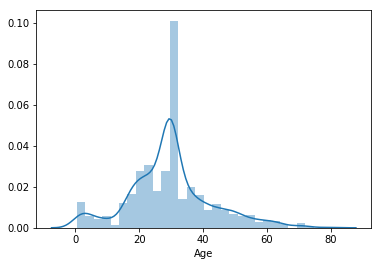

In [10]:
sns.distplot(data['Age']) #visualing age using distplot(kernel and hist)

In [11]:
def trans_age(value):
    if value>15 and value<45:
        out = 0
    else:
        out = 1
    return out

In [12]:
data['Age'] = data['Age'].apply(trans_age).astype(int)

test['Age'] = test['Age'].apply(trans_age).astype(int)

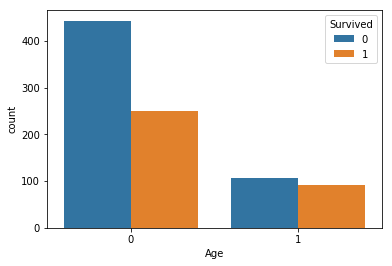

In [13]:
sns.countplot('Age', data = data, hue= 'Survived')

# Embarked

In [14]:
data['Embarked'].mode()[0]

'S'

In [15]:
#Since 'Embarked column' contains CATEGORICAL DATA (S,C,Q), the missing values will be filled with mode of Embarked column
data['Embarked']= data['Embarked'].fillna(data['Embarked'].mode()[0])
test['Embarked']= test['Embarked'].fillna(test['Embarked'].mode()[0])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 73.2+ KB


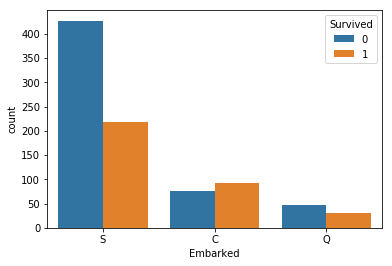

In [17]:
sns.countplot('Embarked', data=data, hue= 'Survived')

In [18]:
np.unique(data['Embarked'])

array(['C', 'Q', 'S'], dtype=object)

In [19]:
#There are two forms of encoding are available using sklearn library; one-hot and label encoding
#For this case, we will be using the pandas method for one-hot encoding (we do not want priority) as shown in the code below.
data = pd.get_dummies(data, columns = ['Embarked'])
test = pd.get_dummies(test, columns = ['Embarked'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes: float64(1), int32(1), int64(5), object(3), uint8(3)
memory usage: 68.8+ KB


# Name, PassengerId

In [21]:
data.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Embarked_C', u'Embarked_Q',
       u'Embarked_S'],
      dtype='object')

In [22]:
data_names = data['Name']
data = data.drop('Name', axis = 1)
test = test.drop('Name', axis = 1)

data_id = data['PassengerId']
data = data.drop('PassengerId', axis = 1)

test_id = test['PassengerId']
test = test.drop('PassengerId', axis = 1)

# Tickets, Fare

In [23]:
data = data.drop('Ticket', axis = 1)
test = test.drop('Ticket', axis = 1)

data = data.drop('Fare', axis = 1)
test = test.drop('Fare', axis = 1)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null object
Age           891 non-null int32
SibSp         891 non-null int64
Parch         891 non-null int64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: int32(1), int64(4), object(1), uint8(3)
memory usage: 41.0+ KB


# Sex

In [25]:
#For this case, we will be using the pandas method for one-hot encoding (we do not want priority) as shown in the code below.
data = pd.get_dummies(data, columns=['Sex'])
test= pd.get_dummies(test, columns=['Sex'])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null int32
SibSp         891 non-null int64
Parch         891 non-null int64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
dtypes: int32(1), int64(4), uint8(5)
memory usage: 35.7 KB


# Parch

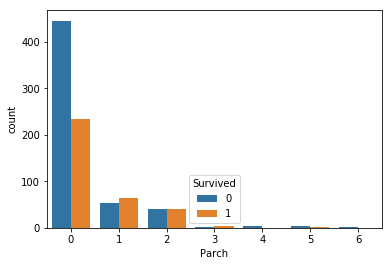

In [27]:
#Looking into the Parch column with respect to survival I have more entries of 0 compared to others, 
#survival and non-survived for this column can be determined using just all entries of 0 in that column. 
#Hence, I can label encode. You can either use, the ‘LabelEncoder’ library for sklearn write a function that does that. 
#In this case, transform_parch does it.

sns.countplot('Parch',data=data, hue='Survived')

In [28]:
def transform_parch(data):
    out = 0
    if data == 0:
        out = 0
    else:
        out = 1
    return out

In [29]:
data['Parch'] = data['Parch'].apply(transform_parch).astype(int)
test['Parch'] = test['Parch'].apply(transform_parch).astype(int)

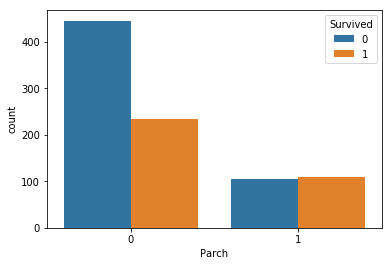

In [30]:
sns.countplot(x = 'Parch', hue = 'Survived', data = data)

# SibSp

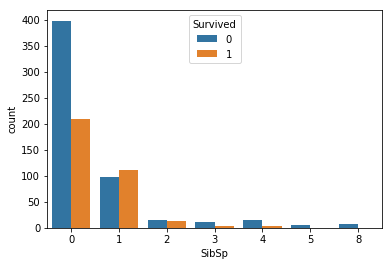

In [31]:
sns.countplot('SibSp', hue='Survived', data = data)

In [32]:
def transform_sibsp(data):
    out = 0
    if data == 0:
        out = 0
    else:
        out = 1
    return out

In [33]:
data['SibSp'] = data['SibSp'].apply(transform_sibsp).astype(int)
test['SibSp'] = test['SibSp'].apply(transform_sibsp).astype(int)

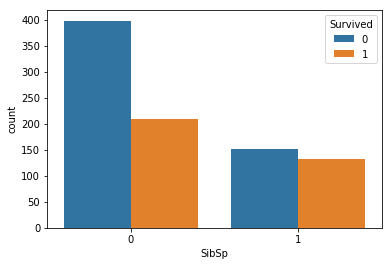

In [34]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = data)

# Pclass

In [35]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [36]:
#For this case, we will be using the pandas method for one-hot encoding (we do not want priority) as shown in the code below.

data = pd.get_dummies(data, columns = ['Pclass'])
test = pd.get_dummies(test, columns = ['Pclass'])

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Age           891 non-null int32
SibSp         891 non-null int32
Parch         891 non-null int32
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Pclass_1      891 non-null uint8
Pclass_2      891 non-null uint8
Pclass_3      891 non-null uint8
dtypes: int32(3), int64(1), uint8(8)
memory usage: 24.4 KB


In [38]:
data.shape, test.shape

((891, 12), (418, 11))

# Modelling

In [39]:
#Now that I have been able to process all dirt in my features i.e cleaning my data
#I can go ahead to separate the target from the actual data using the code below.

y = data['Survived']
x = data.drop('Survived', axis=1)

In [40]:
#Let’s go on to data model. I will be using the library called sklearn. The algorithms I will use includes LogisticRegression,
#Xgbclassifier,RandomForestClassifier and GradientBoostingClassifier. First and foremost, I need to split the train data into 
#train and test so that I can use a percentage to train my model and the rest to evaluate the performance of the model. 
#In this case, my train will take 80% while testing will take 20% using the train_test_split function available in scikit-learn.

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size = 0.2,
                                                    random_state = 42)

# Logistic Regression

In [42]:
Lr = LogisticRegression() # algorithm instantiation
Lr.fit(x_train, y_train) # model learning

# evaluating the train data using accuracy score 
print('Training score is: ', Lr.score(x_train, y_train))

# make your predictions on the test data
pred = Lr.predict(x_test)

# evaluate the test data using accuracy score
print('Testing score is: ', accuracy_score(y_test, pred))

('Training score is: ', 0.7837078651685393)
('Testing score is: ', 0.7597765363128491)


In [43]:
# estimate the f1_score of your predictions
f1_score(y_test, pred)

0.7114093959731544

In [44]:
# classification report of your prediction
classification_report(y_test, pred)

u'              precision    recall  f1-score   support\n\n           0       0.80      0.79      0.79       105\n           1       0.71      0.72      0.71        74\n\n   micro avg       0.76      0.76      0.76       179\n   macro avg       0.75      0.75      0.75       179\nweighted avg       0.76      0.76      0.76       179\n'

# Random Forest Classifier

In [45]:
rand = RandomForestClassifier(random_state= 42)
rand.fit(x_train, y_train) # model learning

# evaluating the train data using accuracy score 
print('Training score is:', rand.score(x_train, y_train))

# make your predictions on the test data
pred= rand.predict(x_test)

# evaluate the test data using accuracy score
print('Testing score is:', accuracy_score(y_test, pred))

('Training score is:', 0.8356741573033708)
('Testing score is:', 0.8044692737430168)


In [46]:
f1_score(y_test, pred)

0.7407407407407408

In [47]:
classification_report(y_test, pred)

u'              precision    recall  f1-score   support\n\n           0       0.80      0.90      0.84       105\n           1       0.82      0.68      0.74        74\n\n   micro avg       0.80      0.80      0.80       179\n   macro avg       0.81      0.79      0.79       179\nweighted avg       0.81      0.80      0.80       179\n'

# Quadient Boosting Classifier

In [48]:
model_grb = GradientBoostingClassifier()
model_grb.fit(x_train,y_train)# model learning

# evaluating the train data using accuracy score 
print('Training score is :', model_grb.score(x_train, y_train))

# make your predictions on the test data
pred = model_grb.predict(x_test)

# evaluate the test data using accuracy score
print('Testing score is:', accuracy_score(y_test,pred))

('Training score is :', 0.827247191011236)
('Testing score is:', 0.8100558659217877)


In [49]:
f1_score(pred,y_test)

0.746268656716418

In [50]:
classification_report(y_test, pred)

u'              precision    recall  f1-score   support\n\n           0       0.80      0.90      0.85       105\n           1       0.83      0.68      0.75        74\n\n   micro avg       0.81      0.81      0.81       179\n   macro avg       0.82      0.79      0.80       179\nweighted avg       0.81      0.81      0.81       179\n'

# My prediction

In [51]:
test.shape, x_train.shape

((418, 11), (712, 11))

In [52]:
gradient_boost_prediction= model_grb.predict(test)
random_forest_prediction= rand.predict(test)
logistic_regression_prediction= Lr.predict(test)

# Random forest prediction

In [53]:
frame_dict = {}
frame_dict['PassengerId'] = test_id
frame_dict['Survived'] = random_forest_prediction
frame = pd.DataFrame(frame_dict)
frame.to_csv('random_forest.csv', index= False)

# Gradient boost prediction

In [54]:
frame_dict = {}
frame_dict['PassengerId'] = test_id
frame_dict['Survived'] = gradient_boost_prediction
frame = pd.DataFrame(frame_dict)
frame.to_csv('gradient_boost.csv', index= False)

# Logistic regression prediction

In [55]:
frame_dict = {}
frame_dict['PassengerId'] = test_id
frame_dict['Survived'] = logistic_regression_prediction
frame = pd.DataFrame(frame_dict)
frame.to_csv('logistic_regression.csv', index= False)